## Analysis GASS

This notebook is meant to analyze the results of the GASS optimisation testing.



**History:** <br>
01.05.2018: moving to python3 <br>
02.05.2018: test sync dropbox/fithub/kubox <br>
21.05.2018: **important** change in the Score definition:  Score = 100.*Score_old (To have a score in percentage.)

In [26]:
import matplotlib.pyplot as pl
import numpy as np
import pickle

%matplotlib inline

dirResults = "./results/"

In [27]:
def read_pickle(filedata):
    
    with open(dirResults+filedata, 'rb') as f:
        data = pickle.load(f,encoding='latin1')
    
    return(data)

##########################################

def find_range_value(arr,val):
    "find start and end for val in arr"
    
    start, end = 0 , 0
    startFound = False
    
    for i in range(len(arr)):
        if arr[i] == val and not startFound:
            start = i
            startFound = True
            
        if arr[i] == val and startFound: 
            end = i
            
    return(start, end)
        
#########################################       
    
def stat_data(key,data):
    "Compute the stats on the Score"
    
    runningValue = data[key][0]
    endInd = len(data[key])
    
    tempDat = []
    tempScoMean = []
    tempScoStd  = []
    
    endFound = False
    while(not endFound):
        ist , ien = find_range_value(data[key], runningValue)
        sco = 100. * np.array(data['Score'][ist:ien])         #### New definition
        
        mn = np.mean(sco)
        std =  np.std(sco)
        
        tempDat.append(runningValue)
        tempScoMean.append(mn)
        tempScoStd.append(std)
            
        if ien < endInd-1:
            runningValue = runningValue = data[key][ien+1]
        else:
            endFound = True
            
    dataStat = {}

    dataStat[key] = tempDat
    
    dataStat['Score'] = {}
    dataStat['Score']['Mean'] = tempScoMean
    dataStat['Score']['Std'] = tempScoStd
        
    return(dataStat) 
  

---------------------------------------------
### Score

The score is computed as following: <br>

The total score is computed: <br>
$$
	\begin{equation}\label{subarray_score}
	\begin{split} 
	score\_array\_j=-\sum_{i=1}^{M} w_{subarray\_i} \times score\_subarray\_i
	\end{split}
	\end{equation}
$$ <br>

With the score for each subarray: <br>
$$
	\begin{equation}\label{score}
	\begin{split} 
	score\_subarray\_i=& w_{\theta_{res},i}\times|\theta_{res\_obj,i}-\theta_{res,i}|\\
	+& w_{\theta_{MRS},i}\times|\theta_{MRS\_obj,i}-\theta_{MRS,i}| \times sign(\theta_{MRS\_obj,i}-\theta_{MRS,i})\\
	+& w_{e,i}\times|e_{obj,i}-e_i| \times sign(e_i-e_{obj,i})\\
	+& w_{s,i}\times|s_{obj,i}-s_i| \times sign(s_i-s_{obj,i})
	\end{split}
	\end{equation}
$$ <br>

It appears that the score should be at least zero and increasing. Given that some subscore can be positive a zero or positive score does not mean that all contraints are completed. **We scale to percentage by multiplying by 100**.

-------------------------

-------------------------

------------------------------------------------------------------------------------------------
### Iteration -------

This plot shows the impact of the iteration number on the score with a dispersion on 10 values for each point. <br>

**Results** : 150 is a conservative value for convergence. We will use it in the following simulation

Last simulation:  Results_30-04-2018_15:57:52


In [28]:
data = read_pickle('score_iteration.pkl')

# print(data)

d = stat_data('Iteration',data)

# print(d['Score']['Mean'])


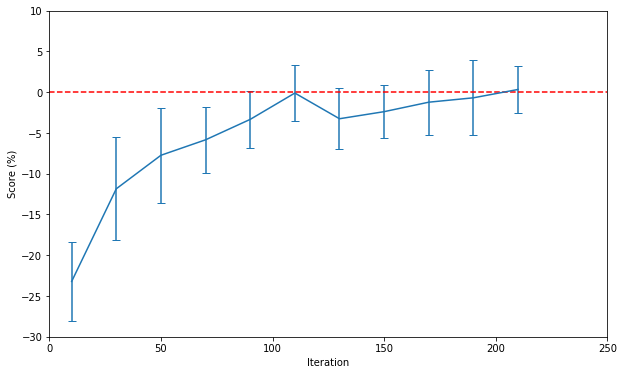

In [29]:
## Plot
xx = d['Iteration']
yy = d['Score']['Mean']
err =  d['Score']['Std']

x1 = np.array(xx)
y1 = np.array(yy)
err1 = np.array(err)

pl.figure(figsize=(10,6))

pl.errorbar(x1 , y1 , err1, capsize = 4.)
pl.plot([0.,250],[0.,0.], "r--")

ax = pl.gca()
ax.set_xlim(0., 250)
ax.set_ylim(-30, 10)

pl.xlabel("Iteration")
pl.ylabel("Score (%)")
pl.show()

-----------------------------------------------------
### Population size -------

The plot shows the correlation between the Score and the population size. <br>

**Results** : The convergence is fast with population size. We set it to 150. <br>

Last simulation: Results_22-05-2018_08:29:55

In [30]:
data = read_pickle('score_population.pkl')

d = stat_data('Population',data)

# print(d['Score']['Mean'])

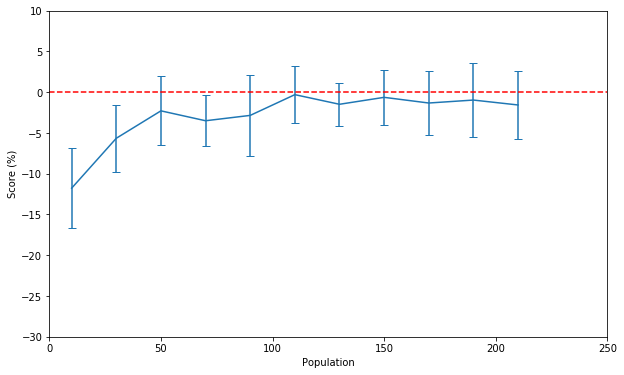

In [31]:
## Plot
xx = d['Population']
yy = d['Score']['Mean']
err =  d['Score']['Std']

x1 = np.array(xx)
y1 = np.array(yy)
err1 = np.array(err)

pl.figure(figsize=(10,6))

pl.errorbar(x1 , y1 , err1, capsize = 4.)
pl.plot([0.,250],[0.,0.], "r--")

ax = pl.gca()
ax.set_xlim(0., 250)
ax.set_ylim(-30, 10)

pl.xlabel("Population")
pl.ylabel("Score (%)")
pl.show()

-----------------------------------------------------
### Elitism -------

The plot shows the correlation between the Score and the Elitism. <br>

**Results** : The convergence is about 4-6. We set it to 5 as a default value. <br>

Last simulation: 

In [32]:
data = read_pickle('score_elitism.pkl')

d = stat_data('Elitism',data)

# print(d['Score']['Mean'])

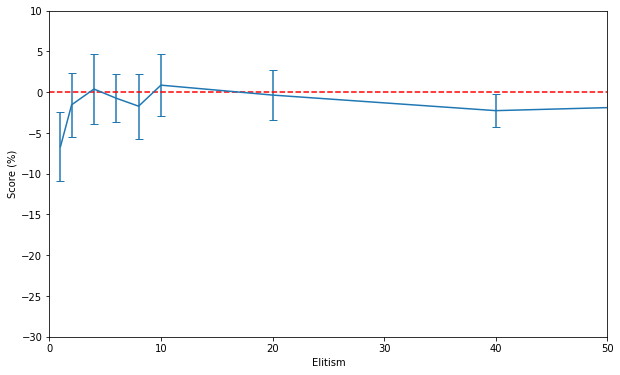

In [33]:
## Plot
xx = d['Elitism']
yy = d['Score']['Mean']
err =  d['Score']['Std']

x1 = np.array(xx)
y1 = np.array(yy)
err1 = np.array(err)

pl.figure(figsize=(10,6))

pl.errorbar(x1 , y1 , err1, capsize = 4.)
pl.plot([0.,100],[0.,0.], "r--")

ax = pl.gca()
ax.set_xlim(0., 50)
ax.set_ylim(-30, 10)

pl.xlabel("Elitism")
pl.ylabel("Score (%)")
pl.show()

-----------------------------------------------------
### Mutation rate -------

The plot shows the correlation between the Score and the mutation rate. <br>

**Results** : The convergence is about 4-6. We set it to XX as a default value. <br>

Last simulation: 

In [32]:
data = read_pickle('score_mutation.pkl')

d = stat_data('Mutation',data)

# print(d['Score']['Mean'])

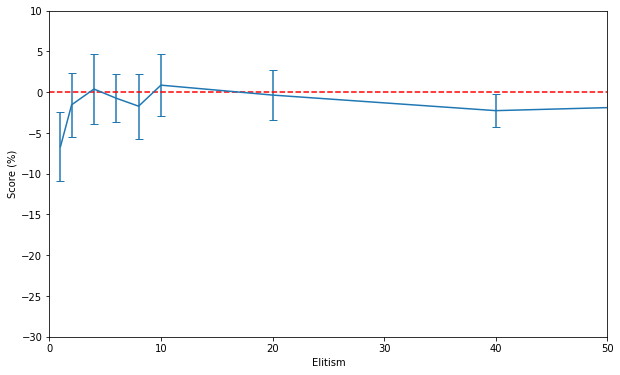

In [33]:
## Plot
xx = d['Mutation']
yy = d['Score']['Mean']
err =  d['Score']['Std']

x1 = np.array(xx)
y1 = np.array(yy)
err1 = np.array(err)

pl.figure(figsize=(10,6))

pl.errorbar(x1 , y1 , err1, capsize = 4.)
pl.plot([0.,100],[0.,0.], "r--")

ax = pl.gca()
ax.set_xlim(0., 1.0)
ax.set_ylim(-30, 10)

pl.xlabel("Mutation")
pl.ylabel("Score (%)")
pl.show()